# Vehicle Insurance Fraud Detection


Vehicle insurance fraud involves conspiring to make false or exaggerated claims involving property damage or personal injuries following an accident. Some common examples include staged accidents where fraudsters deliberately “arrange” for accidents to occur; the use of phantom passengers where people who were not even at the scene of the accident claim to have suffered grievous injury, and make false personal injury claims where personal injuries are grossly exaggerated.

About this dataset

This dataset contains vehicle dataset - attribute, model, accident details, etc along with policy details - policy type, tenure etc. The target is to detect if a claim application is fraudulent or not - FraudFound_P


In [1]:
#Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as ss
from scipy.stats import f_oneway, norm
from collections import Counter
import math
from itertools import product

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, f1_score, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score, ConfusionMatrixDisplay, recall_score, precision_score

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import statsmodels.api as sm

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("fraud_oracle_k.csv")

In [3]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0.0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0.0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0.0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0.0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0.0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [4]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [5]:
df.shape

(15420, 33)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 15420 non-null  object 
 1   WeekOfMonth           15420 non-null  int64  
 2   DayOfWeek             15420 non-null  object 
 3   Make                  15420 non-null  object 
 4   AccidentArea          15420 non-null  object 
 5   DayOfWeekClaimed      15420 non-null  object 
 6   MonthClaimed          15420 non-null  object 
 7   WeekOfMonthClaimed    15420 non-null  int64  
 8   Sex                   15420 non-null  object 
 9   MaritalStatus         15420 non-null  object 
 10  Age                   15420 non-null  int64  
 11  Fault                 15420 non-null  object 
 12  PolicyType            15420 non-null  object 
 13  VehicleCategory       15420 non-null  object 
 14  VehiclePrice          15420 non-null  object 
 15  FraudFound_P       

In [7]:
df.isnull().sum()

Month                      0
WeekOfMonth                0
DayOfWeek                  0
Make                       0
AccidentArea               0
DayOfWeekClaimed           0
MonthClaimed               0
WeekOfMonthClaimed         0
Sex                        0
MaritalStatus              0
Age                        0
Fault                      0
PolicyType                 0
VehicleCategory            0
VehiclePrice               0
FraudFound_P            1779
PolicyNumber               0
RepNumber                  0
Deductible                 0
DriverRating               0
Days_Policy_Accident       0
Days_Policy_Claim          0
PastNumberOfClaims         0
AgeOfVehicle               0
AgeOfPolicyHolder          0
PoliceReportFiled          0
WitnessPresent             0
AgentType                  0
NumberOfSuppliments        0
AddressChange_Claim        0
NumberOfCars               0
Year                       0
BasePolicy                 0
dtype: int64

# EDA


In [8]:
#filling the null values with 1
df.fillna(1, inplace=True)


In [9]:
df = df.drop(columns='PolicyNumber')


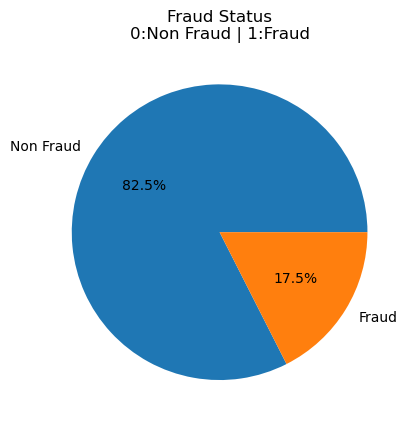

In [10]:
import matplotlib.pyplot as plt

# get the value counts of the variable
value_counts = df["FraudFound_P"].value_counts()

# create the pie chart
plt.pie(value_counts.values, labels=["Non Fraud", "Fraud"], colors=["#1f77b4", "#ff7f0e"], autopct='%1.1f%%')

# set the title
plt.title('Fraud Status\n0:Non Fraud | 1:Fraud')

# show the plot
plt.show()


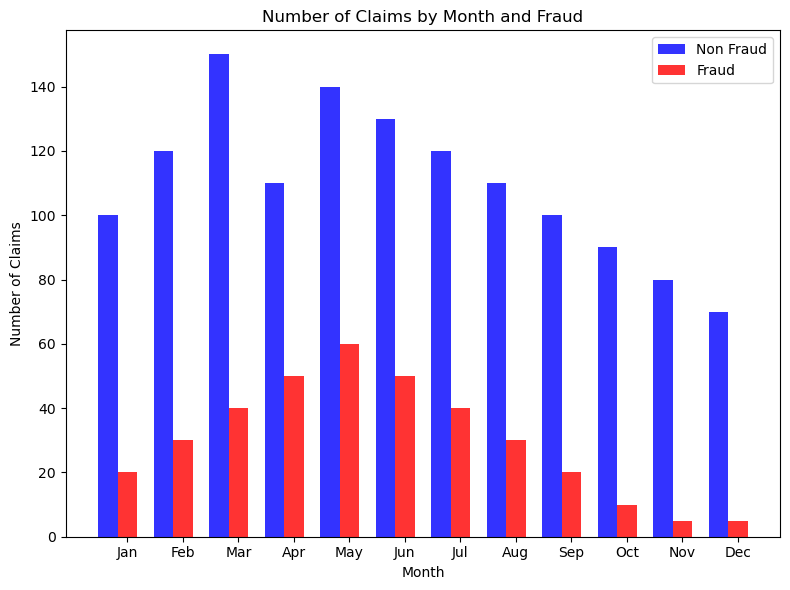

In [11]:
import matplotlib.pyplot as plt

# define data
x = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
non_fraud = [100, 120, 150, 110, 140, 130, 120, 110, 100, 90, 80, 70]
fraud = [20, 30, 40, 50, 60, 50, 40, 30, 20, 10, 5, 5]

# create plot
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
opacity = 0.8

rects1 = ax.bar(x, non_fraud, bar_width, alpha=opacity, color='b', label='Non Fraud')
rects2 = ax.bar([i + bar_width for i in range(len(x))], fraud, bar_width, alpha=opacity, color='r', label='Fraud')

# add labels and titles
ax.set_xlabel('Month')
ax.set_ylabel('Number of Claims')
ax.set_title('Number of Claims by Month and Fraud')
ax.set_xticks([i + bar_width for i in range(len(x))])
ax.set_xticklabels(x)
ax.legend()

plt.tight_layout()
plt.show()


# Preprocessing

In [12]:
# Drop Policy Type
df = df.drop(columns='PolicyType')

In [13]:
from category_encoders.ordinal import OrdinalEncoder

col_ordering = [
    {'col':'AccidentArea','mapping':{'Urban':1, 'Rural':0}},
    {'col':'Sex','mapping':{'Female':1, 'Male':0}},
    {'col':'Fault','mapping':{'Policy Holder':1, 'Third Party':0}},
    {'col':'PoliceReportFiled','mapping':{'Yes':1, 'No':0}},
    {'col':'WitnessPresent','mapping':{'Yes':1, 'No':0}},
    {'col':'AgentType','mapping':{'External':1, 'Internal':0}},
    {'col':'Month','mapping':{'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}},
    {'col':'DayOfWeek','mapping':{'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}},
    {'col':'DayOfWeekClaimed','mapping':{'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}},
    {'col':'MonthClaimed','mapping':{'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}},
    {'col':'PastNumberOfClaims','mapping':{'none':0 ,'1':1,'2 to 4':2,'more than 4':3 }},
    {'col':'NumberOfSuppliments','mapping':{'none':0,'1 to 2':1,'3 to 5':2,'more than 5':3}}, 
    {'col':'VehiclePrice','mapping':{'less than 20000':0,'20000 to 29000':1,'30000 to 39000':2,
                                     '40000 to 59000':3,'60000 to 69000':4,'more than 69000':5}},
    {'col':'AgeOfVehicle','mapping':{'3 years':3,'6 years':6,'7 years':7,'more than 7':8,'5 years':5,'new':0,'4 years':4,'2 years':2}},
    {'col':'Days_Policy_Accident','mapping':{'more than 30':4,'15 to 30':3,'none':0,'1 to 7':1,'8 to 15':2}},
    {'col':'Days_Policy_Claim','mapping':{'more than 30':4,'15 to 30':3,'none':0,'1 to 7':1,'8 to 15':2}},
    {'col':'AgeOfPolicyHolder','mapping':{'16 to 17':1,'18 to 20':2,'21 to 25':3,'26 to 30':4,'31 to 35':5,'36 to 40':6,
                                          '41 to 50':7,'51 to 65':8,'over 65':9}},
    {'col':'AddressChange_Claim','mapping':{'no change':0,'under 6 months':1,'1 year':2,'2 to 3 years':3,'4 to 8 years':4}},
    {'col':'NumberOfCars','mapping':{'1 vehicle':1,'2 vehicles':2,'3 to 4':3,'5 to 8':4,'more than 8':5}}
]
ord_encoder = OrdinalEncoder(mapping = col_ordering, return_df=True)

In [14]:
df2 = ord_encoder.fit_transform(df)
df2

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,VehicleCategory,VehiclePrice,FraudFound_P,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,12,5,3,Honda,1,2.0,1.0,1,1,Single,21,1,Sport,5,0.0,12,300,1,4,4,0,3,4,0,0,1,0,2,3,1994,Liability
1,1,3,3,Honda,1,1.0,1.0,4,0,Single,34,1,Sport,5,0.0,15,400,4,4,4,0,6,5,1,0,1,0,0,1,1994,Collision
2,10,5,5,Honda,1,4.0,11.0,2,0,Married,47,1,Sport,5,0.0,7,400,3,4,4,1,7,7,0,0,1,0,0,1,1994,Collision
3,6,2,6,Toyota,0,5.0,7.0,1,0,Married,65,0,Sport,1,0.0,4,400,2,4,4,1,8,8,1,0,1,3,0,1,1994,Liability
4,1,5,1,Honda,1,2.0,2.0,2,1,Single,27,0,Sport,5,0.0,3,400,1,4,4,0,5,5,0,0,1,0,0,1,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,11,4,5,Toyota,1,2.0,11.0,5,0,Married,35,1,Sedan,1,1.0,5,400,4,4,4,2,6,5,0,0,1,0,0,1,1996,Collision
15416,11,5,4,Pontiac,1,5.0,12.0,1,0,Married,30,1,Sport,2,0.0,11,400,3,4,4,3,6,5,0,0,1,3,0,3,1996,Liability
15417,11,5,4,Toyota,0,5.0,12.0,1,0,Single,24,1,Sedan,1,1.0,4,400,4,4,4,3,5,4,0,0,1,1,0,1,1996,Collision
15418,12,1,1,Toyota,1,4.0,12.0,2,1,Married,34,0,Sedan,1,1.0,6,400,4,4,4,0,2,5,0,0,1,3,0,1,1996,All Perils


In [15]:
df3 = pd.get_dummies(df2, columns=['Make', 'MaritalStatus', 'VehicleCategory', 'BasePolicy'], prefix='', prefix_sep='')

df3

,Month,WeekOfMonth,DayOfWeek,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,Age,Fault,VehiclePrice,FraudFound_P,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,Accura,BMW,Chevrolet,Dodge,Ferrari,Ford,Honda,Jaguar,Lexus,Mazda,Mecedes,Mercury,Nisson,Pontiac,Porche,Saab,Saturn,Toyota,VW,Divorced,Married,Single,Widow,Sedan,Sport,Utility,All Perils,Collision,Liability
0,12,5,3,1,2.0,1.0,1,1,21,1,5,0.0,12,300,1,4,4,0,3,4,0,0,1,0,2,3,1994,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
1,1,3,3,1,1.0,1.0,4,0,34,1,5,0.0,15,400,4,4,4,0,6,5,1,0,1,0,0,1,1994,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
2,10,5,5,1,4.0,11.0,2,0,47,1,5,0.0,7,400,3,4,4,1,7,7,0,0,1,0,0,1,1994,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
3,6,2,6,0,5.0,7.0,1,0,65,0,1,0.0,4,400,2,4,4,1,8,8,1,0,1,3,0,1,1994,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,1,5,1,1,2.0,2.0,2,1,27,0,5,0.0,3,400,1,4,4,0,5,5,0,0,1,0,0,1,1994,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,11,4,5,1,2.0,11.0,5,0,35,1,1,1.0,5,400,4,4,4,2,6,5,0,0,1,0,0,1,1996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0
15416,11,5,4,1,5.0,12.0,1,0,30,1,2,0.0,11,400,3,4,4,3,6,5,0,0,1,3,0,3,1996,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
15417,11,5,4,0,5.0,12.0,1,0,24,1,1,1.0,4,400,4,4,4,3,5,4,0,0,1,1,0,1,1996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
15418,12,1,1,1,4.0,12.0,2,1,34,0,1,1.0,6,400,4,4,4,0,2,5,0,0,1,3,0,1,1996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0


# Split data

In [16]:
X = df3.drop(columns='FraudFound_P')
y = df3['FraudFound_P']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48, stratify=y)

In [18]:
y_train.value_counts()

0.0    10174
1.0     2162
Name: FraudFound_P, dtype: int64

In [19]:
y_test.value_counts()

0.0    2544
1.0     540
Name: FraudFound_P, dtype: int64

# Model Functions

# DecisionTreeClassifier

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Create a decision tree with some hyperparameters
dt_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

# Train the model on the training set
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = dt_model.predict(X_test)

# Calculate the accuracy and classification report on the test set
test_acc = accuracy_score(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print("Test Accuracy:", test_acc*100)
print("Classification Report:\n", class_report)


Test Accuracy: 90.82360570687419
Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.98      0.95      2544
         1.0       0.86      0.57      0.68       540

    accuracy                           0.91      3084
   macro avg       0.89      0.77      0.82      3084
weighted avg       0.90      0.91      0.90      3084

